## Team Video [Hakim, Peigi ]

<iframe width="560" height="315" 
        src="https://www.youtube.com/embed/_xWA2Rwg_jU" 
        title="YouTube video player" frameborder="0" 
        allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" 
        allowfullscreen></iframe>

# CRISP-DM Framework
### 1. Business Understanding

- **Project Objectives**: 

The goal of this project is to predict whether a visitor to an e-commerce website will complete a purchase during their session. This is done by analyzing various session-related variables, such as time spent on specific types of pages, clickstream data, traffic source, and visitor behavior. 


- **Background:**

 Understanding customer behavior is important to be able to navigate in the world of e-commerce. Investing in the wrong marketting or website optimisation stategy can be very costly.And even if done right they often  struggle to convert visitors into buyers. By building a predictive model that can estimate purchase intent based on online behavior, businesses can better target potential customers and reduce bounce rates.
 The dataset used for this project consists of over 12,000 session records from an e-commerce site, with both numerical and categorical features. The class label (Revenue) indicates whether a purchase was made.


**Success Criteria:** 

- Success will be measured using the accuracy,precision, f1-score and recall. This will ensure that it makes correct predictions and also correctly identify true purchasing sessions without misclassifying non-purchasing ones.

**Primary Problem**
- The main business problem is increasing conversion rates on e-commerce websites. By predicting whether a session is likely to end in a purchase, businesses can make smarter decisions, such as targeting users with personalized offers or improving the user journey.


**Who are the stakeholders?**
- The key stakeholders are e-commerce business owners who want to increase sales, digital marketers and data analysts who interpret user behavior to guide decision-making.


**What constraints must be considered?**
- Since the dataset is derived from user behavior, The main contraint is to  ensure that no private information of visitors are included.
- Another contraint is the the model is not designed to be make realtime predictions during a users session. This model looks back at apast dataframe for the analysis 

# 2. Data Understanding 

- **Data Collection:** 

The dataset was sourced from Kaggle, where it was published for academic and analytical purposes. It consists of anonymized session data from an e-commerce website over a one-year period. Each row represents a unique user session to avoid biases from repeated visits by the same user.


- **Data Description:** 

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

-***Key features include:***

**Numerical**:

Administrative, Informational, ProductRelated – number of pages visited in each category

Duration of the above categories – total time spent

BounceRates, ExitRates, PageValue, SpecialDay – various web metrics from Google Analytics

**Categorical**:

Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend – describe session contex



- **Summary statistics** were generated, revealing no missing values but there were  class imbalances and also  categorical features that required encoding for modeling. Visualizations such as histograms and count plots helped identify  feature correlations.


- **Reliability**
 The dataset was downloaded to kaggle from UCI Machine Learning Repository. It was last updated 5 years ago

In [1]:
# adding neccesarry packages
import pandas as pd
import numpy as np

In [2]:
# Loading data 
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Creating a copy of the dataframe to avoid modifying the original data
df_copy = df.copy()

Data Preparation

In [5]:

# Extracting the different values from the 'Month' column

from pandas.api.types import CategoricalDtype

unique_months = df_copy['Month'].unique()

# Create the CategoricalDtype dynamically
catType = CategoricalDtype(categories=sorted(unique_months), ordered=False)  # Sorting optional for structure

# Convert the 'Month' column to the categorical type
df_copy['Month'] = df_copy['Month'].astype(catType)

# Display the modified 'Month' column
print(df_copy['Month'])

0        Feb
1        Feb
2        Feb
3        Feb
4        Feb
        ... 
12325    Dec
12326    Nov
12327    Nov
12328    Nov
12329    Nov
Name: Month, Length: 12330, dtype: category
Categories (10, object): ['Aug', 'Dec', 'Feb', 'Jul', ..., 'May', 'Nov', 'Oct', 'Sep']


In [6]:
# Mapping the month names to their respective numbers
month_mapping = {
    'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Applying the mapping to the Month column
df_copy['Month'] = df_copy['Month'].map(month_mapping)

# Display the updated column
print(df_copy['Month'])

0         2
1         2
2         2
3         2
4         2
         ..
12325    12
12326    11
12327    11
12328    11
12329    11
Name: Month, Length: 12330, dtype: category
Categories (10, int64): [8, 12, 2, 7, ..., 5, 11, 10, 9]


In [7]:
df_copy['Month'] = df_copy['Month'].astype(int)

In [8]:
unique_visitortype = df['VisitorType'].unique()
print(unique_visitortype)

['Returning_Visitor' 'New_Visitor' 'Other']


In [9]:
# Encoding variable Visitortype
from sklearn.preprocessing import StandardScaler, LabelEncoder 
 
label_encoders = {'VisitorType': LabelEncoder()}
df_copy['VisitorType'] = label_encoders['VisitorType'].fit_transform(df_copy['VisitorType'])

In [10]:
# Coverting the 'Weekend' and 'Revenue' columns to integers
df_copy['Weekend'] = df_copy['Weekend'].astype(int)
df_copy['Revenue'] = df_copy['Revenue'].astype(int)


In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
df_copy.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [13]:
# there are huge range differences in data, so i have to scale the data

In [14]:
# Normalizing the features 
from sklearn.preprocessing import StandardScaler
import pandas as pd


features = df_copy.drop('Revenue', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Convert back to DataFrame to easily check mean and std
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns)




In [15]:
X_scaled_df.describe()
# The results now are standardized with a means of almost 0 and standard deviation of close to one

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.996612e-17,6.281359e-17,-4.610172e-18,-2.535595e-17,4.610172e-17,-8.298309e-17,-6.454241e-17,3.688137e-17,1.060340e-16,-5.532206e-17,-2.212882e-16,4.610172e-18,1.498306e-17,7.722038e-17,-2.996612e-17,-5.071189e-17,2.305086e-18
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,-1.665924e+00,-1.233426e+00,-7.902929e-01,-8.941785e-01,-7.626290e-01,-2.487697e+00,-5.505517e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01,-7.816737e-01,-1.360783e-01,-2.079519e-01,-8.941785e-01,-5.141822e-01,4.077864e-01,-5.505517e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01,-1.921733e-01,-1.360783e-01,-2.079519e-01,-6.136354e-02,-5.141822e-01,4.077864e-01,-5.505517e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01,9.868275e-01,9.612698e-01,-2.079519e-01,3.550439e-01,-1.728851e-02,4.077864e-01,-5.505517e-01
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00,1.281578e+00,6.448010e+00,6.197799e+00,2.437081e+00,3.957861e+00,4.077864e-01,1.816360e+00


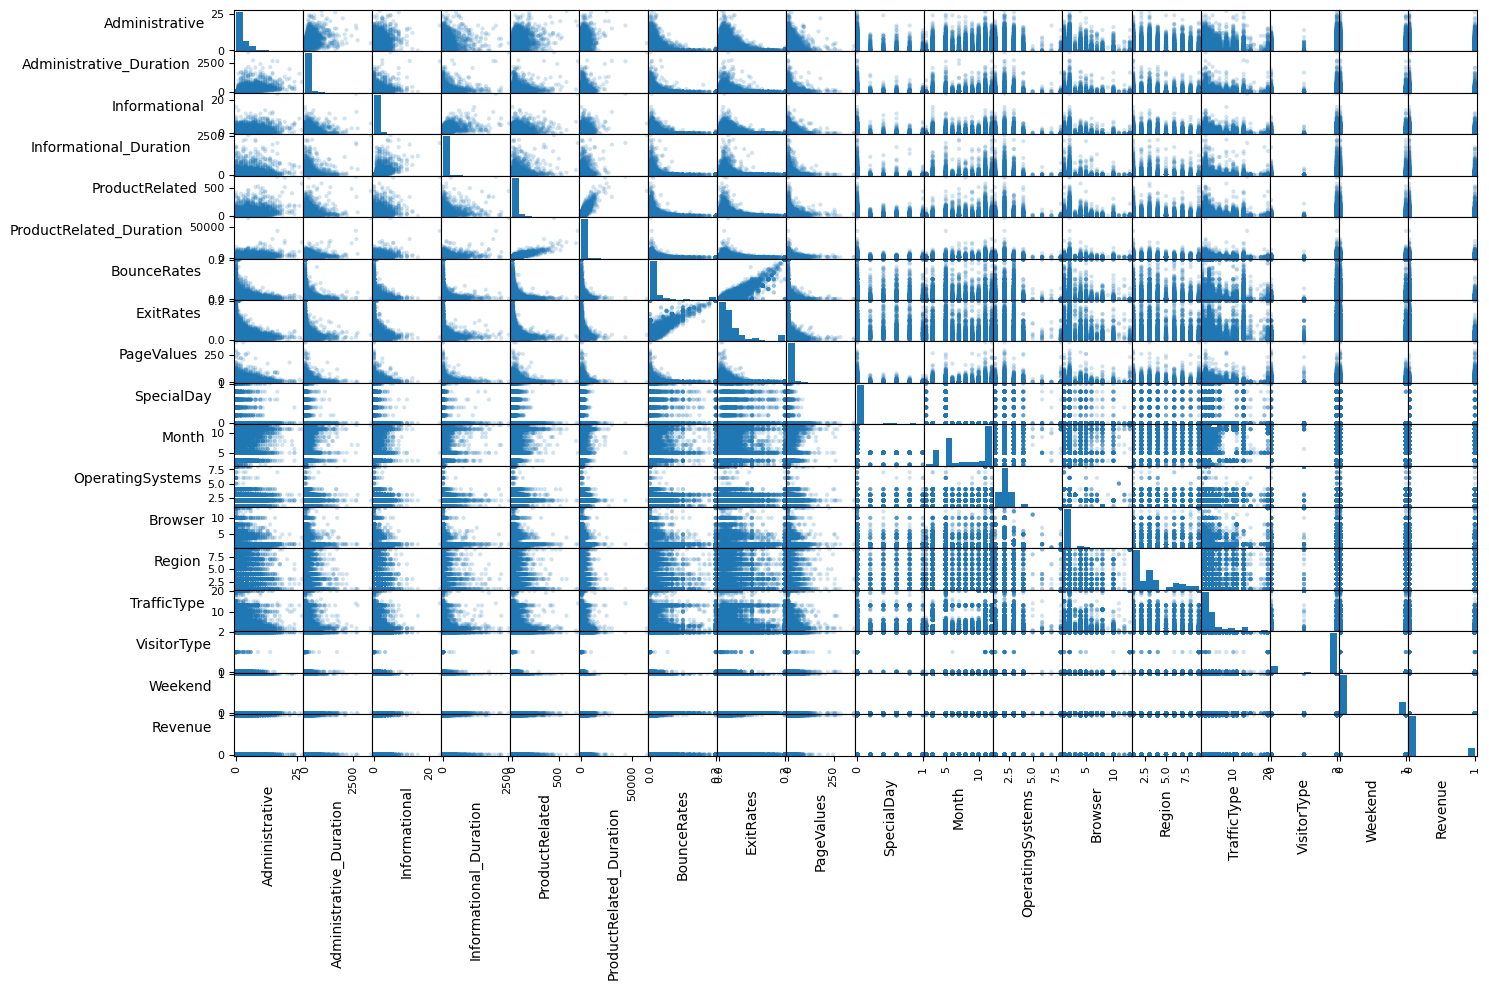

In [16]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Selecting all columns
filtered_df = df_copy

# Plotting the scatter matrix
fig = scatter_matrix(filtered_df, alpha=0.2, figsize=(15, 10), diagonal="hist")
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

# Modeling 
The models i chose for the analysis were KNN , RandomForest and XGboost. I chose them because 
- KNN was chosen due to its ease of implementation and interpretability

- Random Forest was used because of the huge number of features in the dataset. Random Forest ist known to work well with high dimentional datasets.

- XGBoost was selected because it  delivers strong performance on tabular data and allows fine-grained control over model complexity.

## Hyperparameter tuning
1. **KNN** 
The hyper perimeters used for the KNN model are as follows:
- n_neighbors = 19  : determines the number of nearest neighbors to consider when making a prediction. I used a large KNN so it will not be too sensitive to noise 


2. **Random Forest** 
Hyperparameters
- n_estimators = 	[50, 100, 200]	Number of trees
- max_depth 	 [10, 20, 30, none]	
- Maximum tree depth

- Class-weight	‘balalanced	Handle class imbalance automatically
- Cross validation cv 	5	
- evaluate each hyperparameter combination.
- random_state  	42	Reproducibility
- Scoring metric 	recall	Focus on correctly identifying Class 1


3. **XGboost**
Hyperparameters

- n_estimators = 	[50, 100, 200]	Number of trees
- max_depth 	 [10, 20, 30, none]	
- Maximum tree depth

- learning_rate 	| [0.01, 0.1, 0.2]	Shrinks the contribution of each tree
- cv	5	evaluate each hyperparameter combination.
- random_state  	42	reproducibility
- Scoring metric 	recall	Focus on correctly identifying Class 1
- scale_pos_weight	Calculated as (negative class count / positive class count)	Balances class imbalance
-  eval_metric	'logloss'	Evaluation metric for training




In [17]:
# defining the features and target variable
X = X_scaled_df
y = df_copy['Revenue']

In [18]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X_scaled_df , y, test_size=0.3, random_state=42)

In [19]:
# Smote for oversampling
from imblearn.over_sampling import SMOTE
# Using SMOTE to handle class imbalances
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\hacky\anaconda3\envs\my_env\Lib\subprocess.py", line 550, in

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 19)
knn.fit(X_train.iloc[:,:15], y_train)

KNeighborsClassifier(n_neighbors=19)

In [21]:
y_pred = knn.predict((X_test.iloc[:,:15]))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8778048121113815

In [22]:
# DIsplaying precision, recall and f1 score
from sklearn.metrics import classification_report
precision_recall_f1 = classification_report(y_test, y_pred)
print(precision_recall_f1)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.75      0.32      0.45       575

    accuracy                           0.88      3699
   macro avg       0.82      0.65      0.69      3699
weighted avg       0.87      0.88      0.86      3699



In [23]:
y_pred = knn.predict((X_test.iloc[:,:15]))
print(y_pred)

[0 0 0 ... 0 1 0]


In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[3061,   63],
       [ 389,  186]])

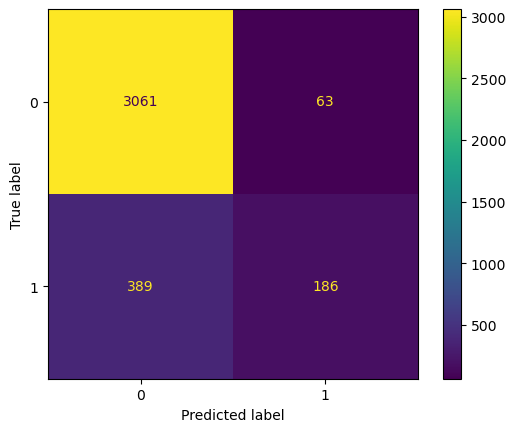

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

# Random forest 

In [26]:
# Random Forest Classifier for Imbalanced Data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define model with class_weight balanced
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None]
}

# Grid Search - Scoring F1 because we care about class 1 performance
grid_search_rf = GridSearchCV(
    rf_model, 
    param_grid_rf, 
    cv=5, 
    scoring='f1',   
    verbose=1, 
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)

# Best model
best_estimator_rf = grid_search_rf.best_estimator_

# Predict Probabilities
y_proba_rf = best_estimator_rf.predict_proba(X_test)[:,1]

# Apply Threshold Tuning (Default is 0.5 — let's try 0.4)
threshold = 0.4
y_pred_rf = (y_proba_rf >= threshold).astype(int)

# Evaluation
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest Accuracy: 0.8702

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3124
           1       0.55      0.83      0.67       575

    accuracy                           0.87      3699
   macro avg       0.76      0.86      0.79      3699
weighted avg       0.90      0.87      0.88      3699


Confusion Matrix:
[[2739  385]
 [  95  480]]


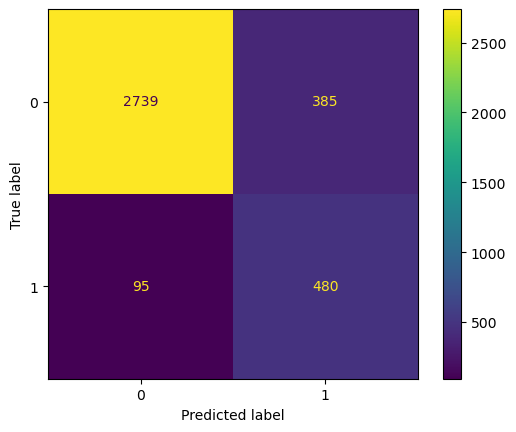

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=best_estimator_rf.classes_)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_estimator_rf.classes_)
disp_rf.plot()

# XGboost 

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Calculate scale_pos_weight
neg, pos = np.bincount(y_train)
scale_weight = neg / pos
print(f"scale_pos_weight: {scale_weight:.2f}")

# Define XGBoost with class imbalance handling
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_weight
)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid_xgb,
    cv=5,
    scoring='recall',  # Focus on catching Class 1
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

best_estimator_xgb = grid_search_xgb.best_estimator_

y_pred_xgb = best_estimator_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


scale_pos_weight: 5.47
Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBoost Accuracy: 0.8616
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3124
           1       0.54      0.83      0.65       575

    accuracy                           0.86      3699
   macro avg       0.75      0.85      0.78      3699
weighted avg       0.90      0.86      0.87      3699



c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:39:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


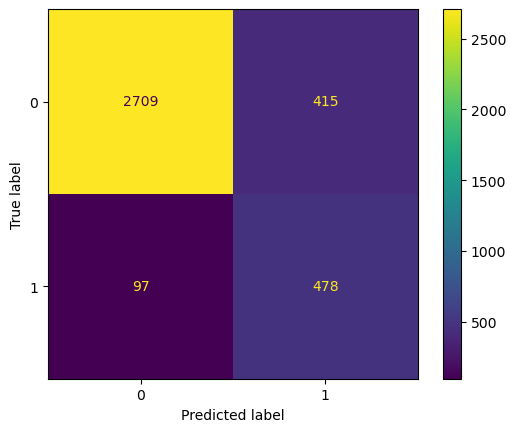

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=best_estimator_xgb.classes_)

# Display the confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=best_estimator_xgb.classes_)
disp_xgb.plot()

# Dumnmy Classifier 

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a DummyClassifier with the "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluate the DummyClassifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print(f"Dummy Classifier Accuracy: {accuracy_dummy:.4f}")

# Display precision, recall, and F1 score
precision_recall_f1_dummy = classification_report(y_test, y_pred_dummy)
print(precision_recall_f1_dummy)

Dummy Classifier Accuracy: 0.8446
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      3124
           1       0.00      0.00      0.00       575

    accuracy                           0.84      3699
   macro avg       0.42      0.50      0.46      3699
weighted avg       0.71      0.84      0.77      3699



c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


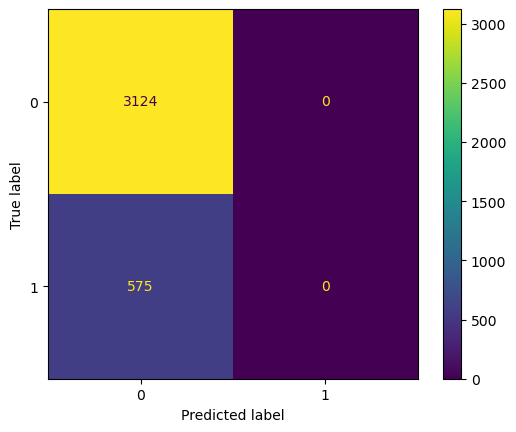

In [31]:
# Compute the confusion matrix for the Dummy Classifier
cm_dummy = confusion_matrix(y_test, y_pred_dummy, labels=dummy_clf.classes_)

# Display the confusion matrix
disp_dummy = ConfusionMatrixDisplay(confusion_matrix=cm_dummy, display_labels=dummy_clf.classes_)
disp_dummy.plot()

In [32]:
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)

In [33]:
precision_recall_f1_dummy = classification_report(y_test, y_pred_dummy)
precision_recall_f1_rf = classification_report(y_test, y_pred_rf)
precision_recall_f1_xgb = classification_report(y_test, y_pred_xgb)
precision_recall_f1_knn = classification_report(y_test, y_pred)


c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hacky\anaconda3\envs\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Evaluation of Performance Metrics
The performance of the models was evaluated using Accuracy, Precision, Recall, and F1-Score.

Accuracy shows the overall correctness of the model but may be misleading for imbalanced datasets.

Precision measures how many of the predicted purchases were actually correct. High precision means fewer false positives.

Recall is critical for this project as it measures how well the model identifies actual purchases (class 1). High recall reduces false negatives.

F1-Score provides a balance between Precision and Recall. It is especially useful for imbalanced datasets like ours.

Since our goal is to improve class 1 prediction (purchase), more emphasis was placed on Recall and F1-Score when comparing models.

In [34]:
# Updating the metrics_data dictionary to include the Dummy Classifier scores
metrics_data = {
    'Model': ['KNN', 'Random Forest', 'XGBoost', 'Dummy Classifier'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_xgb, accuracy_dummy],
    'Precision': [
        float(precision_recall_f1.split()[5]),  # Extracting precision for KNN
        float(precision_recall_f1_rf.split()[5]),  # Extracting precision for Random Forest
        float(precision_recall_f1_xgb.split()[5]),  # Extracting precision for XGBoost
        float(precision_recall_f1_dummy.split()[5])  # Extracting precision for Dummy Classifier
    ],
    'Recall': [
        float(precision_recall_f1.split()[6]),  # Extracting recall for KNN
        float(precision_recall_f1_rf.split()[6]),  # Extracting recall for Random Forest
        float(precision_recall_f1_xgb.split()[6]),  # Extracting recall for XGBoost
        float(precision_recall_f1_dummy.split()[6])  # Extracting recall for Dummy Classifier
    ],
    'F1 Score': [
        float(precision_recall_f1.split()[7]),  # Extracting F1 score for KNN
        float(precision_recall_f1_rf.split()[7]),  # Extracting F1 score for Random Forest
        float(precision_recall_f1_xgb.split()[7]),  # Extracting F1 score for XGBoost
        float(precision_recall_f1_dummy.split()[7])  # Extracting F1 score for Dummy Classifier
    ]
}

# Creating the updated DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Displaying the updated DataFrame
print(metrics_df)

              Model  Accuracy  Precision  Recall  F1 Score
0               KNN  0.877805       0.89    0.98      0.93
1     Random Forest  0.870235       0.97    0.88      0.92
2           XGBoost  0.861584       0.97    0.87      0.91
3  Dummy Classifier  0.844553       0.84    1.00      0.92
